In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
os.chdir("/home/kruu/git_folder/wake_encounter/run")
from wake_encounter_plot import generate_wake_plot, params_encounter, params_wake, read_encounter_results

# Random speed and angles // Constant target time and crossing point
source_path_close = "/backup/kruu/wake_encounter_simulations/t20_close"
source_path_medium = "/backup/kruu/wake_encounter_simulations/t20_medium"
source_path_far = "/backup/kruu/wake_encounter_simulations/t20_far"

****
# Load simulation parameters
****

In [2]:
# Simulation parameters
params_t20_close = params_encounter(source_path=source_path_close)
params_t20_medium = params_encounter(source_path=source_path_medium)
params_t20_far = params_encounter(source_path=source_path_far)

In [3]:
# Same wake far all source simulations in all source paths
wakes_param, wakes_df = params_wake(source_path=source_path_close, id=0)

In [4]:
# Simulation results
results_t20_close = read_encounter_results(source_path_close)
results_t20_medium = read_encounter_results(source_path_medium)
results_t20_far = read_encounter_results(source_path_far)

****
# Scenario visualisation
****

In [5]:
print(f"Theta = 20° for close distance simulation: {params_t20_close.query('theta == 20').simulation_index.iloc[0]}")
print(f"Theta = 20° for medium distance simulation: {params_t20_medium.query('theta == 20').simulation_index.iloc[0]}")
print(f"Theta = 20° for far distance simulation: {params_t20_far.query('theta == 20').simulation_index.iloc[0]}")

Theta = 20° for close distance simulation: 104
Theta = 20° for medium distance simulation: 13
Theta = 20° for far distance simulation: 167


In [9]:
import plotly.offline as py_offline

sim_id = 167
path_plot = source_path_far
encounter_plot_path = os.path.join(path_plot, "encounters", str(sim_id), "encounter_df.parquet")
wake_plot_path = os.path.join(path_plot, "wakes", str(0), "wakes_df.parquet")

figure = generate_wake_plot(encounter_plot_path, wake_plot_path)

# Render the plot
print("Rendering the plot...")
py_offline.iplot(figure)

# Save the plot
file_path = "/home/kruu/git_folder/wake_encounter/run/scenario.html"
print(f"Saving the plot to {file_path}...")
figure.write_html(file_path)

Rendering the plot...


Saving the plot to /home/kruu/git_folder/wake_encounter/run/scenario.html...


In [10]:
# Calulate the distance between the crossing point and the wake tube center at the gate x = -1 (in meters)

wake = wakes_df.query(f"t == 20")
dist_close = np.sqrt((params_t20_close.y_target.values[0] - wake['yr'].values)**2 + (params_t20_close.z_target.values[0] - wake['zr'].values[0])**2)
dist_medium = np.sqrt((params_t20_medium.y_target.values[0] - wake['yr'].values)**2 + (params_t20_medium.z_target.values[0] - wake['zr'].values[0])**2)
dist_far = np.sqrt((params_t20_far.y_target.values[0] - wake['yr'].values)**2 + (params_t20_far.z_target.values[0] - wake['zr'].values[0])**2)

print(f"Distance close: {np.round(dist_close.item(),2)} m")
print(f"Distance medium: {np.round(dist_medium.item(),2)} m")
print(f"Distance far: {np.round(dist_far.item(),2)} m")

Distance close: 22.19 m
Distance medium: 164.83 m
Distance far: 465.22 m


****
# Plot RMC
****

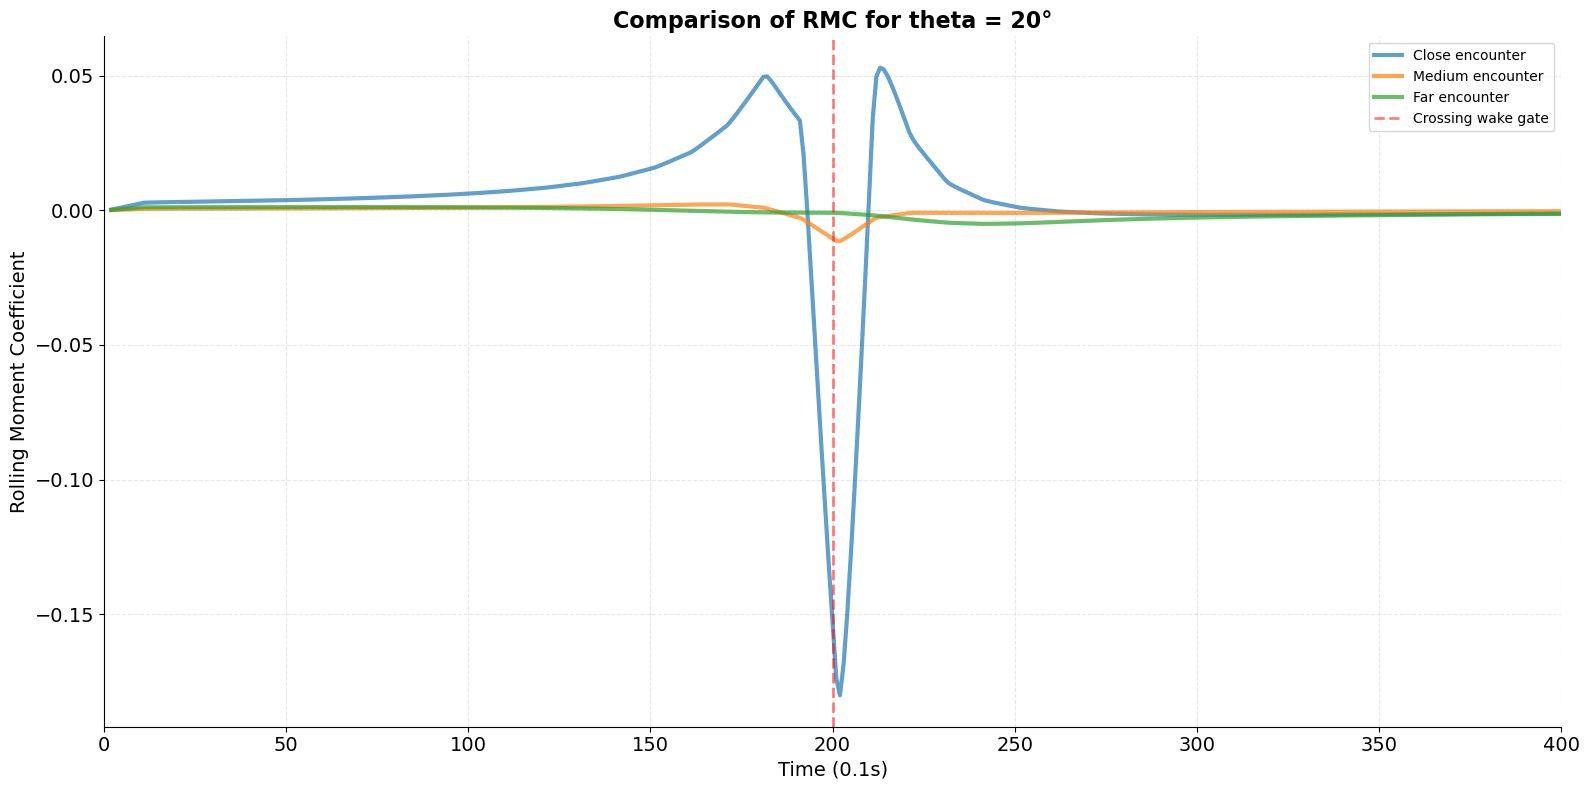

In [11]:
# List of dataframes
dataframes = [results_t20_close[104], results_t20_medium[13], results_t20_far[167]]
labels = ["Close encounter", "Medium encounter", "Far encounter"]

plt.figure(figsize=(16, 8))
plt.grid(alpha=0.3, linestyle='--')

for i, (df, label) in enumerate(zip(dataframes, labels)):
    plt.plot(df["C_l"], label=label, linewidth=3, alpha=0.7)

plt.axvline(x=200, color='r', linestyle='--', linewidth=2, alpha = 0.5, label="Crossing wake gate")

plt.legend(title="Scenarios", fontsize='medium', frameon=False)
plt.legend()

plt.xlim(0, 400)

# Add labels and title for better clarity
plt.xlabel("Time (0.1s)", fontsize=14)
plt.ylabel("Rolling Moment Coefficient", fontsize=14)
plt.title("Comparison of RMC for theta = 20°", fontsize=16, fontweight='bold')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()

plt.gca().spines['top'].set_visible(False) 
plt.gca().spines['right'].set_visible(False) 

# Show the plot
plt.show()

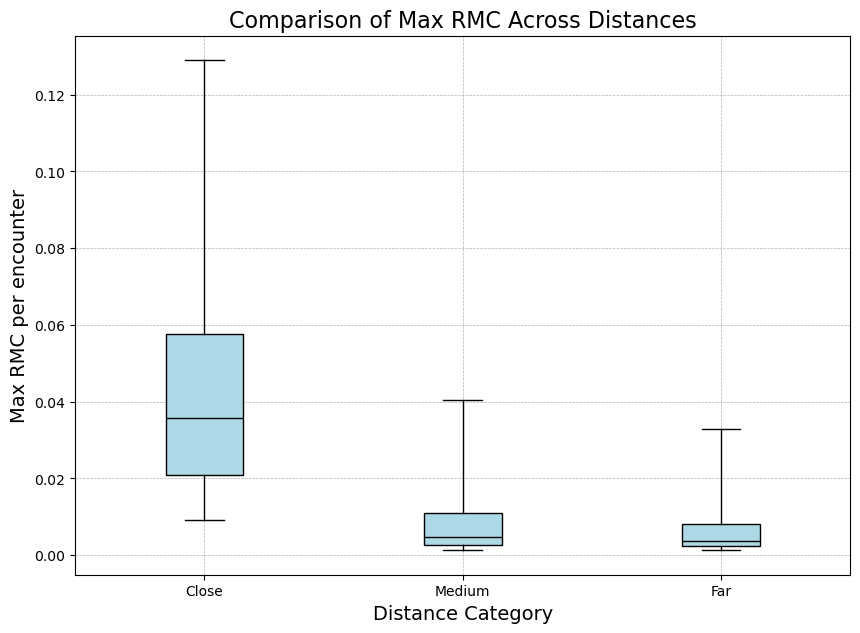

In [12]:
# mean / std of max RMC for the close, medium and far encounters
max_rmc_close = [v["C_l"].abs().max() for _, v in results_t20_close.items()]
max_rmc_medium = [v["C_l"].abs().max() for _, v in results_t20_medium.items()]
max_rmc_far = [v["C_l"].abs().max() for _, v in results_t20_far.items()]

plt.figure(figsize=(10, 7))
plt.boxplot(
    [max_rmc_close, max_rmc_medium, max_rmc_far],
    labels=["Close", "Medium", "Far"],
    patch_artist=True,
    boxprops=dict(facecolor="lightblue", color="black"),
    medianprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
    showfliers=False,
    # notch = True, # Notched boxplot to display the 95% CI on the median -> No need as we have a lot of data
    # bootstrap= 1000, # Bootstrap to calculate 95% CI on the median -> long af
    whis=[2.5,97.5], # Whiskers show specific percentiles of the data
)

plt.title("Comparison of Max RMC Across Distances", fontsize=16)
plt.ylabel("Max RMC per encounter", fontsize=14)
plt.xlabel("Distance Category", fontsize=14)

plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.gca().patch.set_alpha(0.3)

- The roll capability for a DC-9 is RMC = 0.065 (Source: a paper), which should be quite similar to an A320. Simulations for mdeium distance and far distance seem to be off this limit. We will explore further the RMC for close distances.

- According to an estimation of the RMC based on the rool capability of 15-30°/s and chatGPT, the RMC should rarely exceeds 0.1 in normal flight conditions.

- We can also have a look at the load factor



****
# Looking potentially dangerous simulations: close distance
****

## Correlation between the max RMC and the parameters

In [32]:
results_t20_close[0].columns

Index(['Drag', 'Side', 'Lift', 'Rolling', 'Pitching', 'Yawing', 'C_L', 'C_D',
       'C_Y', 'C_l', 'C_m', 'C_n'],
      dtype='object')

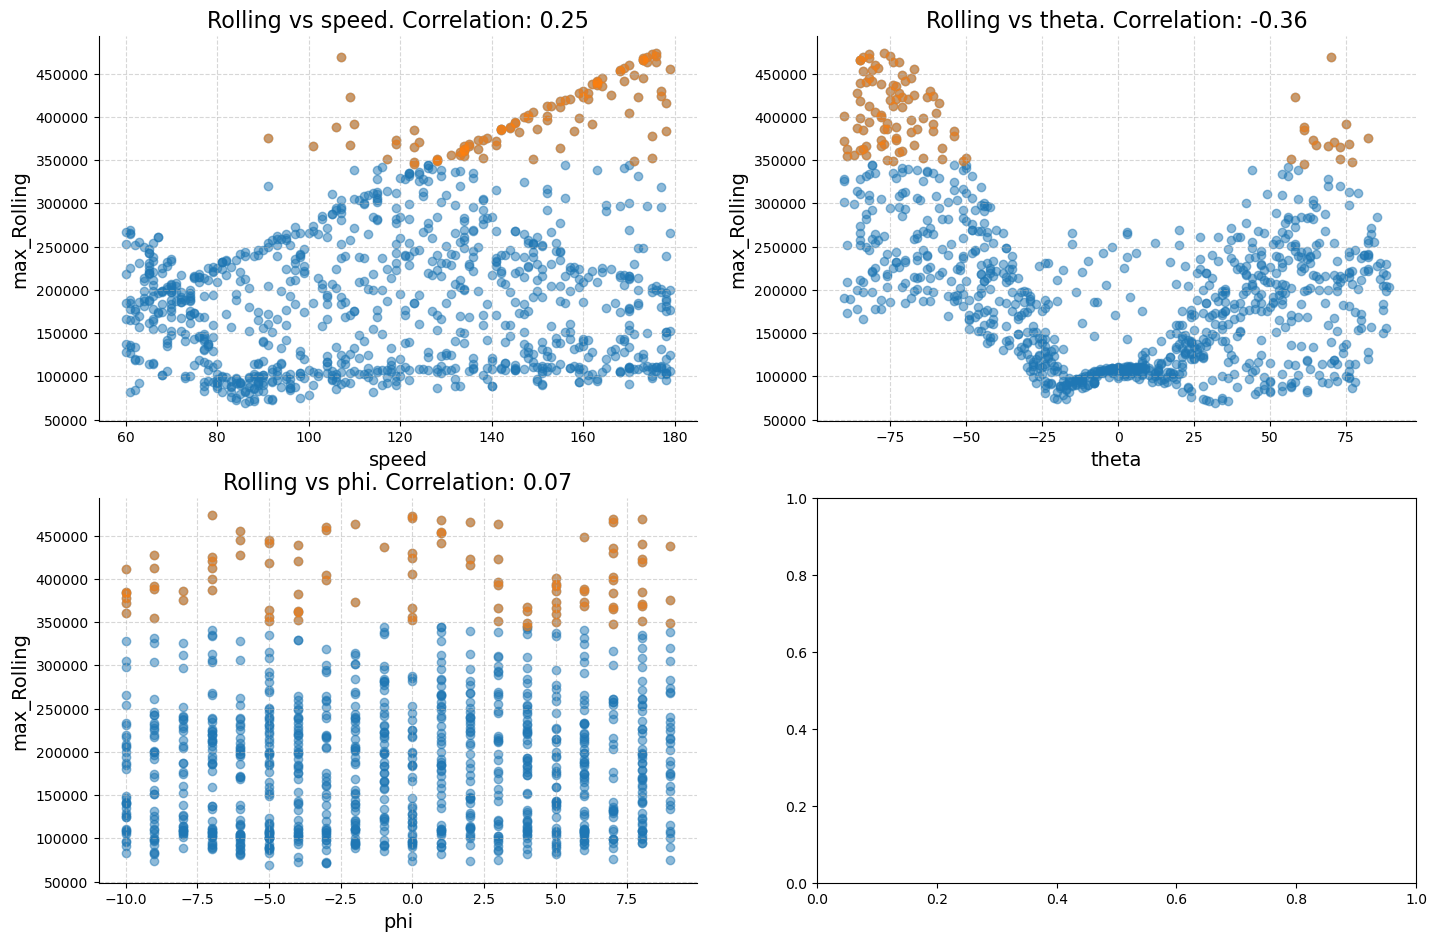

In [39]:
params_to_study = "Rolling"
params_to_plot = ["speed", "theta", "phi"] 

data_to_plot = pd.DataFrame.from_dict({k: v[params_to_study].abs().max() for k, v in results_t20_close.items()}, orient="index", columns=[f"max_{params_to_study}"])
for param in params_to_plot:
    temp = pd.DataFrame.from_dict({k: params_t20_close.query(f"simulation_index == {k}")[f"{param}"].values[0] for k in data_to_plot.index}, orient="index", columns=[param])
    data_to_plot = pd.concat([data_to_plot, temp], axis=1)
    
severe_encounters = data_to_plot.query(f"max_{params_to_study} > {data_to_plot[f'max_{params_to_study}'].quantile(0.90)}")

fig, axes = plt.subplots(2, 2, figsize=(17, 11))
axes = axes.flatten()
for i, param in enumerate(params_to_plot):
        axes[i].scatter(data_to_plot[param], data_to_plot[f"max_{params_to_study}"], alpha=0.5)
        axes[i].scatter(severe_encounters[param], severe_encounters[f"max_{params_to_study}"], alpha=0.5)
        axes[i].set_title(f"{params_to_study} vs {param}. Correlation: {np.round(data_to_plot[param].corr(data_to_plot[f'max_{params_to_study}']),2)}", fontsize=16)
        axes[i].set_xlabel(param, fontsize=14)
        axes[i].set_ylabel(f"max_{params_to_study}", fontsize=14)
        axes[i].grid(True, linestyle="--", alpha=0.5)
        axes[i].spines['top'].set_visible(False)
        axes[i].spines['right'].set_visible(False)
        


In [25]:
data_to_plot[f"max_{params_to_study}"].quantile([0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

0.25    115298.449875
0.50    190076.307200
0.75    253239.150000
0.90    344788.057770
0.95    393934.010230
0.99    459998.061084
Name: max_Rolling, dtype: float64

## Pairwise dependency

/tmp/ipykernel_599029/38708142.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



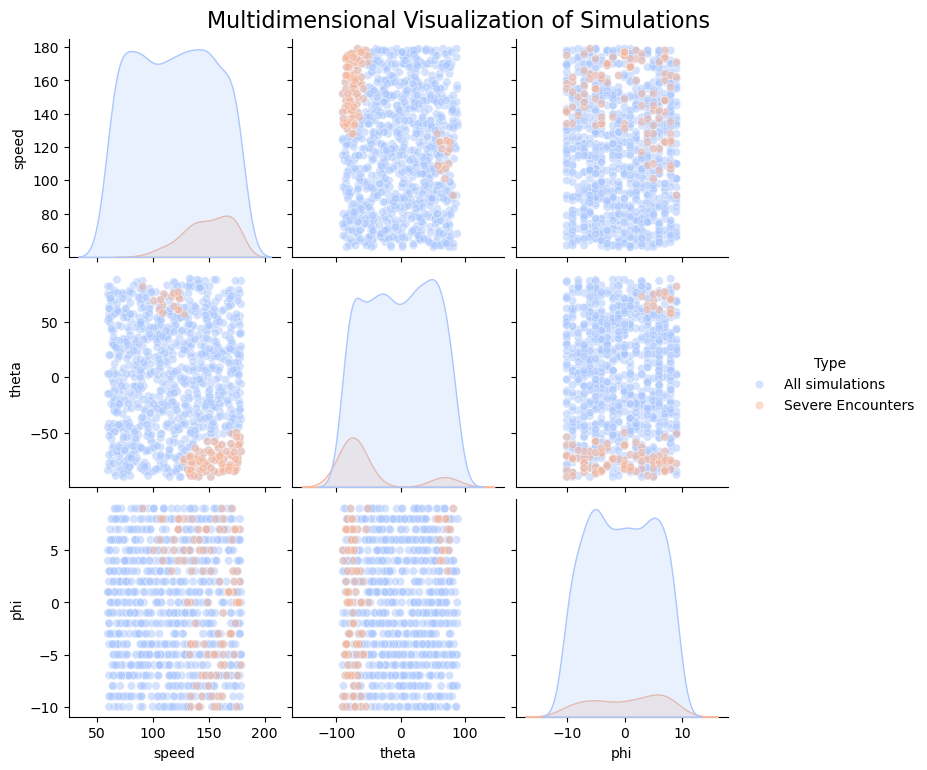

In [ ]:
columns_to_plot = ['speed', 'theta', 'phi']

params_t20_close['Type'] = 'All simulations'
severe_encounters['Type'] = 'Severe Encounters'
combined_data = pd.concat([params_t20_close, severe_encounters])

# Use seaborn pairplot to visualize pairwise interactions
sns.pairplot(combined_data, vars=columns_to_plot, hue="Type", palette="coolwarm", diag_kind="kde", plot_kws={'alpha': 0.5})
plt.suptitle("Multidimensional Visualization of Simulations", y=1.02, fontsize = 16) 
plt.show()

## 3D Scatter plot

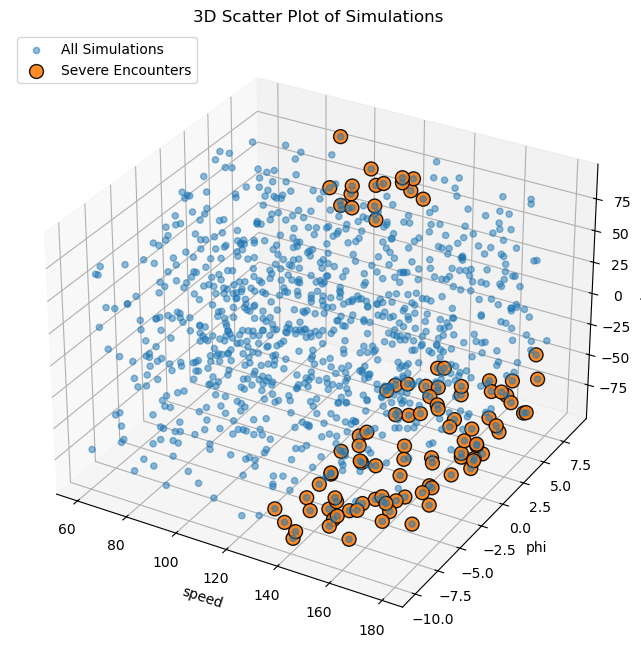

In [27]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Select three variables for the 3D scatter plot
x_col = 'speed'
y_col = 'phi'
z_col = 'theta'

# Create the 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot for all simulations
sc = ax.scatter(params_t20_close[x_col], 
                params_t20_close[y_col], 
                params_t20_close[z_col],  
                alpha=0.5, label='All Simulations')

# Plot for severe encounters
sc_severe = ax.scatter(severe_encounters[x_col], 
                       severe_encounters[y_col], 
                       severe_encounters[z_col],  
                       edgecolor='black', alpha=0.9, label='Severe Encounters', s=100)

# Add labels and title
ax.set_xlabel(x_col)
ax.set_ylabel(y_col)
ax.set_zlabel(z_col)
ax.set_title('3D Scatter Plot of Simulations')
ax.legend(loc='upper left')

plt.show()

****
# Max RMC as a function of the hitting distance
***

Run a 1000 simulations for:
- t_target = 20s
- v = 80 m/s
- theta = 20°
- phi = 0°

In [10]:
source_path_distance = "/backup/kruu/wake_encounter_simulations/t20_theta20_phi0_speed80_random_dist"
params_t20_distance = params_encounter(source_path=source_path_distance)
results_t20_distance = read_encounter_results(source_path_distance)

In [16]:
# Calulate the distance between the crossing point and the wake tube center at the gate x = -1 (in meters)

wake = wakes_df.query(f"t == 20")
params_t20_distance["dist_to_wake_r"] = np.sqrt((params_t20_distance.y_target - wake['yr'].values)**2 + (params_t20_distance.z_target - wake['zr'].values)**2)

In [ ]:
wake.zl.item()

-77.267

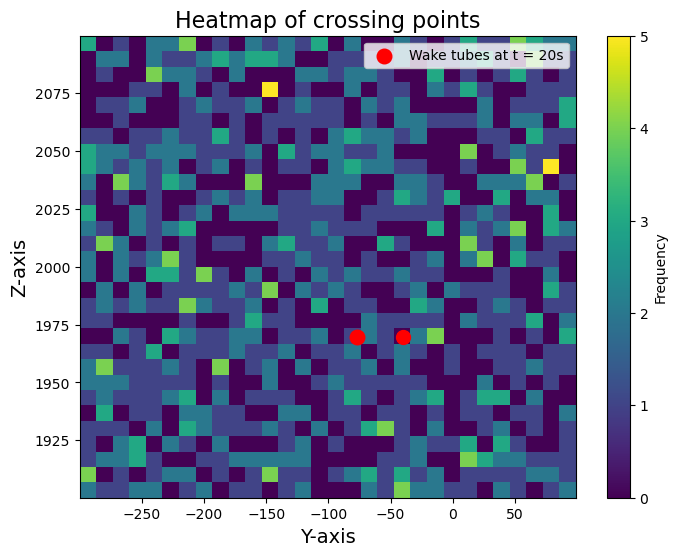

In [26]:
if 'y_target' in params_t20_distance.columns and 'z_target' in params_t20_distance.columns:
    plt.figure(figsize=(8, 6))
    plt.hist2d(
        params_t20_distance['y_target'], 
        params_t20_distance['z_target'], 
        bins=30, 
        cmap='viridis'
    )
    plt.colorbar(label='Frequency')
    plt.title('Heatmap of crossing points', fontsize=16)
    plt.xlabel('Y-axis', fontsize=14)
    plt.ylabel('Z-axis', fontsize=14)
    plt.grid(False)
    
    plt.scatter(wake.yl.item(), wake.zl.item(), color='red', label='Wake tubes at t = 20s', s=110)
    plt.scatter(wake.yr.item(), wake.zr.item(), color='red', s=100)
    plt.legend(loc='upper right')
    plt.show()
else:
    print("Columns 'y_target' and/or 'z_target' not found in dataframe.")

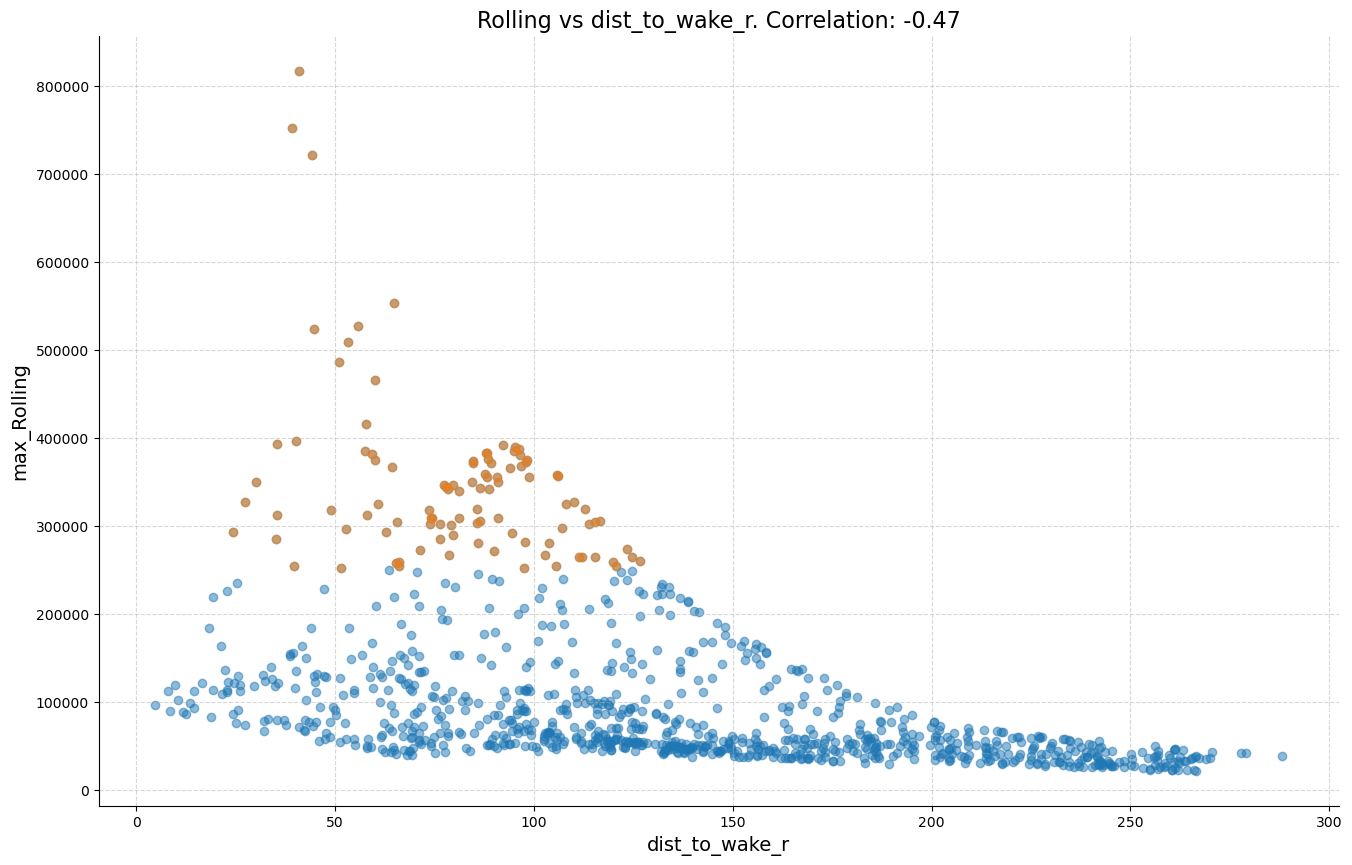

In [31]:
params_to_study = "Rolling"
params_to_plot = ["dist_to_wake_r"] 

data_to_plot = pd.DataFrame.from_dict({k: v[params_to_study].abs().max() for k, v in results_t20_distance.items()}, orient="index", columns=[f"max_{params_to_study}"])
for param in params_to_plot:
    temp = pd.DataFrame.from_dict({k: params_t20_distance.query(f"simulation_index == {k}")[f"{param}"].values[0] for k in data_to_plot.index}, orient="index", columns=[param])
    data_to_plot = pd.concat([data_to_plot, temp], axis=1)
    
severe_encounters = data_to_plot.query(f"max_{params_to_study} > {data_to_plot[f'max_{params_to_study}'].quantile(0.90)}")

fig, ax = plt.subplots(figsize=(16, 10))
ax.scatter(data_to_plot[params_to_plot[0]], data_to_plot[f"max_{params_to_study}"], alpha=0.5)
ax.scatter(severe_encounters[params_to_plot[0]], severe_encounters[f"max_{params_to_study}"], alpha=0.5)
ax.set_title(f"{params_to_study} vs {params_to_plot[0]}. Correlation: {np.round(data_to_plot[params_to_plot[0]].corr(data_to_plot[f'max_{params_to_study}']),2)}", fontsize=16)
ax.set_xlabel(params_to_plot[0], fontsize=14)
ax.set_ylabel(f"max_{params_to_study}", fontsize=14)
plt.gca().spines['top'].set_visible(False) 
plt.gca().spines['right'].set_visible(False) 
ax.grid(True, linestyle='--', alpha=0.5)